In [9]:
import numpy as np
import sklearn
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from perceptron import Perceptron
from layers.dense import Dense
from activations.relu import ReLU
from activations.linear import Linear
from losses.mse_loss import MSELoss
from optimizers.gradient_descent import OptimizerGD

In [2]:
X, y = make_regression(n_samples=200, n_features=3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train).reshape((len(y_train),1))
y_test = np.array(y_test.reshape((len(y_test),1)))
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(160, 3)
(40, 3)
(160, 1)
(40, 1)


In [3]:
model = Perceptron()

model.add_layer(Dense(3, 16))
model.add_layer(ReLU())
model.add_layer(Dense(16, 1))
model.add_layer(Linear())
model.set_loss(MSELoss(stopping_criterion=0.01))
model.set_optimizer(OptimizerGD(0.0001))

In [7]:
reg_history = model.fit(115, X_train, y_train, False)
y_pred = model.predict(X_test)
NN_mae = sklearn.metrics.mean_absolute_error(y_test, y_pred)
NN_mse = sklearn.metrics.mean_squared_error(y_test, y_pred)
NN_R2 = sklearn.metrics.r2_score(y_test, y_pred)
NN_mape = sklearn.metrics.mean_absolute_percentage_error(y_test, y_pred)
print('MAE:', NN_mae)
print('MSE:', NN_mse)
print('R2:', NN_R2)
print('MAPE:', NN_mape)

MAE: 0.27077604345577655
MSE: 0.1423775856717809
R2: 0.9999893325167789
MAPE: 0.07671641599300219


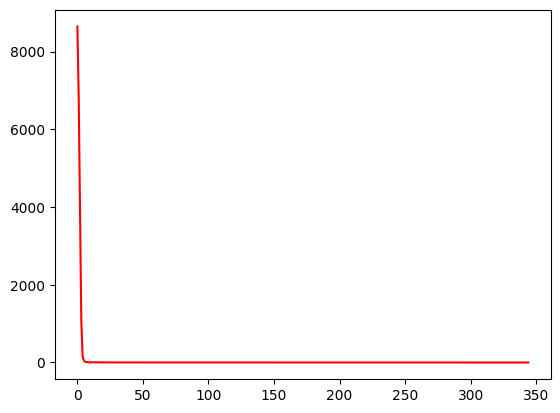

In [10]:
plt.plot(reg_history,color='red')